# Final Project Data Analysis

## 1. Imports

In [46]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import math as mt

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from typing import List
from typing import Tuple

## 2. Import Sorted CSV File

In [48]:
sorted_df = pd.read_csv("heart_sorted.csv")

## 3. ML Model Predictions:
a. KNN

b. Linear Regression

## A. (KNN)

In [49]:
def find_optimal_k_stan(ycol):

    X = sorted_df.drop(columns=[ycol])
    y = sorted_df[ycol]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    scaler = StandardScaler()
    
    X_train_standard = scaler.fit_transform(X_train)
    X_test_standard = scaler.transform(X_test)    
    
    best_k = 0
    best_score = 0
    for k in range(1,21):
        knn = KNeighborsClassifier(n_neighbors=((2*k)+1))
        knn.fit(X_train_standard, y_train)
        score = knn.score(X_test_standard, y_test)
        if score > best_score:
            best_k = k
            best_score = score

    knn = KNeighborsClassifier(n_neighbors=best_k)
    knn.fit(X_train, y_train)
    
    
    y_pred = knn.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)
    
    return best_k, test_accuracy, conf_matrix, class_report

Optimal k: 7
Test Accuracy: 0.6992753623188406
Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.68      0.65       112
           1       0.76      0.71      0.74       164

    accuracy                           0.70       276
   macro avg       0.69      0.70      0.69       276
weighted avg       0.71      0.70      0.70       276



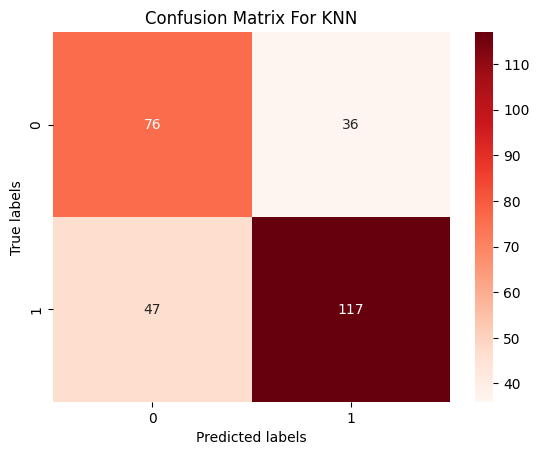

In [50]:
ycolstan = "HeartDisease"
best_k, test_accuracy, conf_matrix, class_report = find_optimal_k_stan(ycolstan)

print(f"Optimal k: {best_k}")
print(f"Test Accuracy: {test_accuracy}")
print("Classification Report:")
print(class_report)
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Reds')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix For KNN')
plt.show()

## B. (Logistic Regression)

In [51]:
def train_logistic_regression_stan(ycol) -> float:
    X = sorted_df.drop(columns=[ycol])
    y = sorted_df[ycol]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    scaler = StandardScaler()
    
    X_train_standard = scaler.fit_transform(X_train)
    X_test_standard = scaler.transform(X_test)

    log_reg = LogisticRegression(max_iter=100)
    log_reg.fit(X_train_standard, y_train)

    y_pred = log_reg.predict(X_test_standard)

    test_accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)
    
    return test_accuracy, conf_matrix, class_report


Test Accuracy: 0.8532608695652174
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.87      0.83        77
           1       0.90      0.84      0.87       107

    accuracy                           0.85       184
   macro avg       0.85      0.86      0.85       184
weighted avg       0.86      0.85      0.85       184



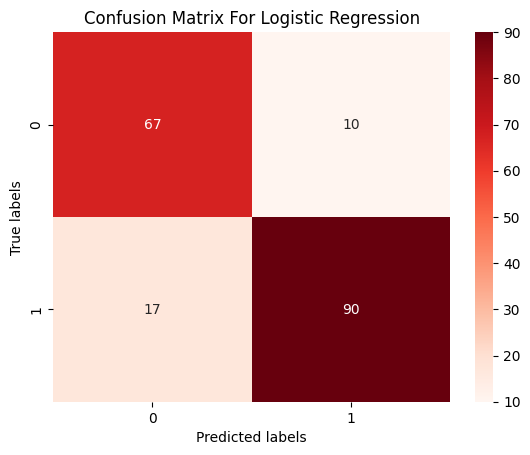

In [52]:
input_stan = "HeartDisease"
test_accuracy, conf_matrix, class_report = train_logistic_regression_stan(input_stan)
print(f"Test Accuracy: {test_accuracy}")
print("Classification Report:")
print(class_report)
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Reds')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix For Logistic Regression')
plt.show()